# DRILL: Mo' blobs, mo' problems?

There are a lot of different clustering methods – we're going to review just 3 more here: Mean-shift, Spectral Clustering, and Affinity Propagation. 

For all 3 methods, we'll be using the same simulated dataset, with three "blobs." The data is simulated and comes pre-normalized, but with real data, normalization will be important to make sure all features are given equal weight in finding a clustering solution.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

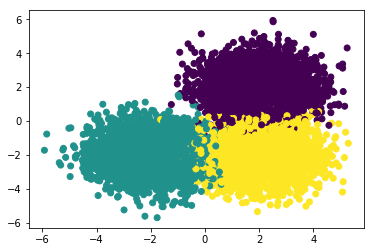

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# Centers of our blobs
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with 2 features representing 3 clusters, 
# each with a std of 1
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

## Mean-Shift

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


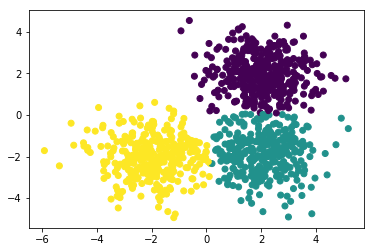

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

## Spectral clustering

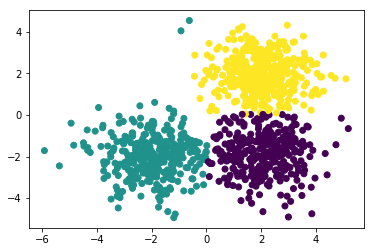

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       10    2  350
1        9  310    1
2      305    6    7


In [5]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

## Affinity propagation¶

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 93


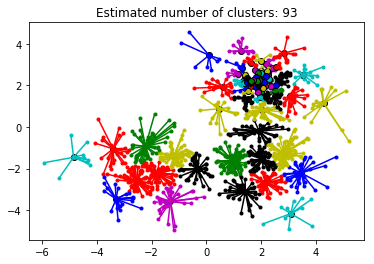

In [7]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

__You've seen how these 3 methods work on 3 blobs of reasonably separated data.__

__Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart.__ 

__Set up at least three different blob configuations, then run the 4 methods (k-means, mean shift, spectral clustering and affinity propagation) on each one.__

__Discuss what you learned about the clustering methods based on their relative performance for your different blob setups.__

## Blob Configuration #1 – More blobs, farther apart

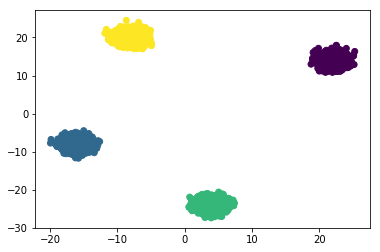

In [8]:
# Centers of our blobs
centers = [[22, 14], [-16, -8], [4, -24], [-8, 20]]

# Make 10,000 rows worth of data with 3 features representing 4 clusters, 
# each with a std of 1
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=3,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means

TRAINING:
k-means vs. actual data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0  239    0    0
2        0    0    0  250
3        0    0  238    0


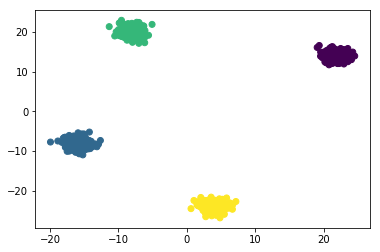



TESTING:
k-means vs. actual data:
col_0     0     1     2     3
row_0                        
0      2227     0     0     0
1         0  2261     0     0
2         0     0     0  2250
3         0     0  2262     0


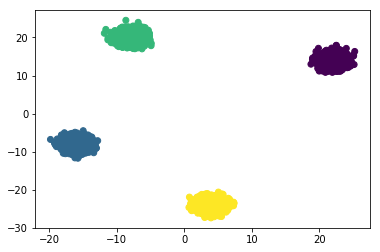

In [9]:
def run_k_means(num_clusters, X, y):
    # Calculate predicted values
    y_pred = KMeans(n_clusters=num_clusters, random_state=42).fit_predict(X)

    # Check predicted vs. actual data
    print('k-means vs. actual data:')
    print(pd.crosstab(y_pred, y))

    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.show()

print('TRAINING:')
run_k_means(4, X_train, y_train)

print('\n\nTESTING:')
run_k_means(4, X_test, y_test)

### Mean-Shift

TRAINING:
Number of estimated clusters: 4


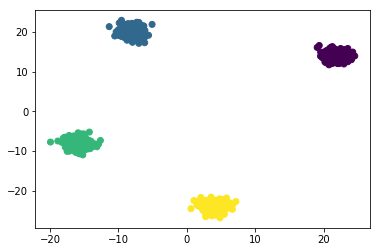

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    0  239    0
2        0    0    0  238
3        0  250    0    0


TESTING:
Number of estimated clusters: 4


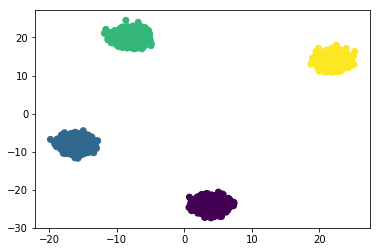

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0         0     0     0  2227
1         0  2261     0     0
2      2262     0     0     0
3         0     0  2250     0


In [10]:
def run_mean_shift(X, y):
    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))

    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y,labels))

print('TRAINING:')
run_mean_shift(X_train, y_train)

print('\n\nTESTING:')
run_mean_shift(X_test, y_test)

### Spectral Clustering

TRAINING:


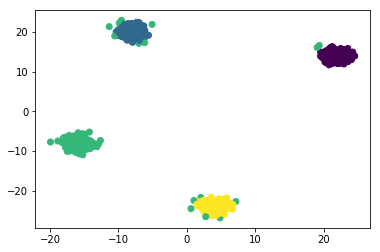

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      271    0    2    0
1        0    0  239    0
2        0    0    6  232
3        0  243    7    0


TESTING:


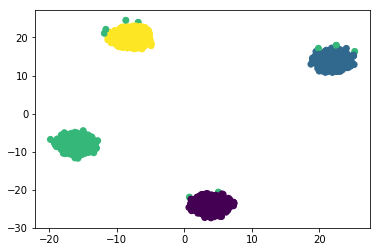

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0         0  2223     4     0
1         0     0  2261     0
2      2260     0     2     0
3         0     0     4  2246


In [11]:
def run_spectral_clustering(num_clusters, X, y):
    # Declare and fit the model
    sc = SpectralClustering(n_clusters=num_clusters)
    sc.fit(X)

    # Predicted clusters.
    predict=sc.fit_predict(X)

    # Graph results.
    plt.scatter(X[:, 0], X[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y, predict))

print('TRAINING:')
run_spectral_clustering(4, X_train, y_train)

print('\n\nTESTING:')
run_spectral_clustering(4, X_test, y_test)

### Affinity Propagation

TRAINING:
Estimated number of clusters: 1000


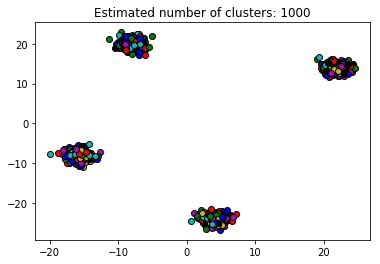



TESTING:
Estimated number of clusters: 8995


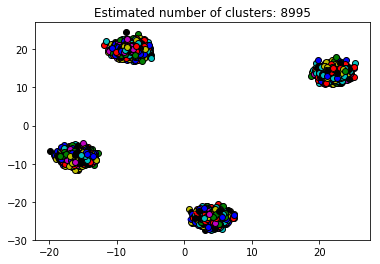

In [12]:
def run_affinity(X):
    # Declare the model and fit it
    af = AffinityPropagation().fit(X)

    # Pull the number of clusters and cluster assignments for each data point
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

    plt.figure(1)
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()

    
print('TRAINING:')
run_affinity(X_train)

print('\n\nTESTING:')
run_affinity(X_test)

## Blob Configuration #2 - More blobs, closer together

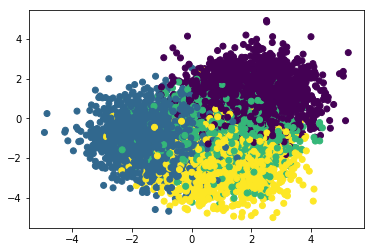

In [13]:
# Centers of our blobs
centers = [[2, 1], [-1, -1], [1, -1], [1, -2]]

# Make 10,000 rows worth of data with 3 features representing 4 clusters, 
# each with a std of 0.5
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=3,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means

TRAINING:
k-means vs. actual data:
col_0    0    1    2    3
row_0                    
0       44   19  120   86
1        0   27   54  132
2        4  190   41   29
3      225    3   23    3


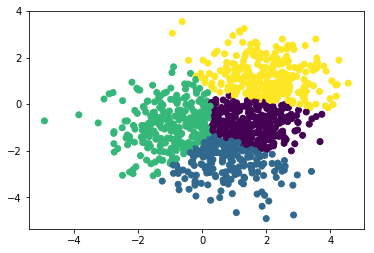



TESTING:
k-means vs. actual data:
col_0     0     1     2     3
row_0                        
0        12   197   603  1392
1       513   182  1205   603
2        30  1863   324   239
3      1672    19   130    16


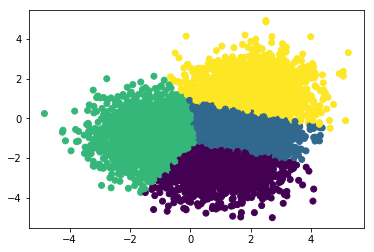

In [14]:
print('TRAINING:')
run_k_means(4, X_train, y_train)

print('\n\nTESTING:')
run_k_means(4, X_test, y_test)

### Mean-Shift

TRAINING:
Number of estimated clusters: 1


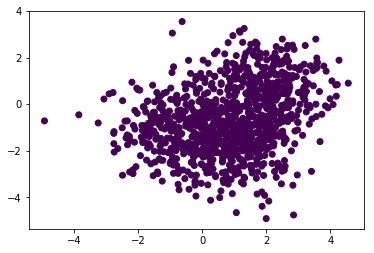

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      273
1      239
2      238
3      250


TESTING:
Number of estimated clusters: 1


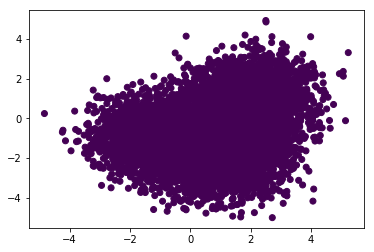

Comparing the assigned categories to the ones in the data:
col_0     0
row_0      
0      2227
1      2261
2      2262
3      2250


In [15]:
print('TRAINING:')
run_mean_shift(X_train, y_train)

print('\n\nTESTING:')
run_mean_shift(X_test, y_test)

### Spectral Clustering

TRAINING:


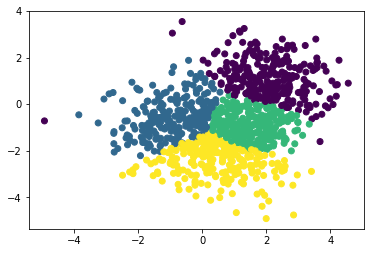

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      229   12   32    0
1        2  160   18   59
2       24   41  121   52
3        3   19   93  135


TESTING:


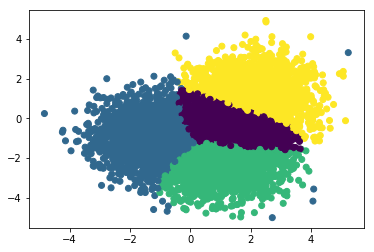

Comparing the assigned categories to the ones in the data:
col_0     0     1     2     3
row_0                        
0       549    23    21  1634
1       242  1798   213     8
2      1168   269   722   103
3       494   225  1512    19


In [16]:
print('TRAINING:')
run_spectral_clustering(4, X_train, y_train)

print('\n\nTESTING:')
run_spectral_clustering(4, X_test, y_test)

### Affinity Propagation

TRAINING:
Estimated number of clusters: 36


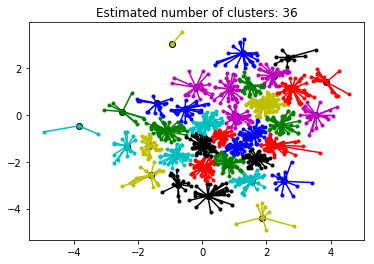



TESTING:
Estimated number of clusters: 3032


In [ ]:
print('TRAINING:')
run_affinity(X_train)

print('\n\nTESTING:')
run_affinity(X_test)

## Blob Configuration #3 – Fewer blobs, farther apart

In [ ]:
# Centers of our blobs
centers = [[22, 14], [4, -24]]

# Make 10,000 rows worth of data with 3 features representing 4 clusters, 
# each with a std of 3
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=3,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means

In [ ]:
print('TRAINING:')
run_k_means(2, X_train, y_train)

print('\n\nTESTING:')
run_k_means(2, X_test, y_test)

### Mean-Shift

In [ ]:
print('TRAINING:')
run_mean_shift(X_train, y_train)

print('\n\nTESTING:')
run_mean_shift(X_test, y_test)

### Spectral Clustering

In [ ]:
print('TRAINING:')
run_spectral_clustering(2, X_train, y_train)

print('\n\nTESTING:')
run_spectral_clustering(2, X_test, y_test)

### Affinity Propagation

In [ ]:
print('TRAINING:')
run_affinity(X_train)

print('\n\nTESTING:')
run_affinity(X_test)

## Blob Configuration #4 - Fewer blobs, closer together

In [ ]:
# Centers of our blobs
centers = [[-1, -1], [1, -1]]

# Make 10,000 rows worth of data with 3 features representing 4 clusters, 
# each with a std of 0.5
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=3,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

### K-Means

In [ ]:
print('TRAINING:')
run_k_means(2, X_train, y_train)

print('\n\nTESTING:')
run_k_means(2, X_test, y_test)

### Mean-Shift

In [ ]:
print('TRAINING:')
run_mean_shift(X_train, y_train)

print('\n\nTESTING:')
run_mean_shift(X_test, y_test)

### Spectral Clustering

In [ ]:
print('TRAINING:')
run_spectral_clustering(2, X_train, y_train)

print('\n\nTESTING:')
run_spectral_clustering(2, X_test, y_test)

### Affinity Propagation

In [ ]:
print('TRAINING:')
run_affinity(X_train)

print('\n\nTESTING:')
run_affinity(X_test)